# Laboratorio 7
## Clasificación de Malware
Clasificación de malware con identificación de imágenes (TF & Keras)
> #### Gerardo Méndez 18239
> #### María José Castro 181202

In [14]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
from tensorflow import keras
from keras.constraints import maxnorm
from keras.preprocessing.image import ImageDataGenerator

### PARTE 1
Carga de Imágenes & Preprocesamiento

#### Carga de datasets

In [2]:
batch_size = 32
img_height = 128
img_width = 128

In [3]:
DATA_DIRECTORY = 'data/images'

In [4]:
dataset = tf.keras.utils.image_dataset_from_directory(
  DATA_DIRECTORY,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 9339 files belonging to 25 classes.


In [5]:
class_names = dataset.class_names
print(class_names)

['Adialer.C', 'Agent.FYI', 'Allaple.A', 'Allaple.L', 'Alueron.gen!J', 'Autorun.K', 'C2LOP.P', 'C2LOP.gen!g', 'Dialplatform.B', 'Dontovo.A', 'Fakerean', 'Instantaccess', 'Lolyda.AA1', 'Lolyda.AA2', 'Lolyda.AA3', 'Lolyda.AT', 'Malex.gen!J', 'Obfuscator.AD', 'Rbot!gen', 'Skintrim.N', 'Swizzor.gen!E', 'Swizzor.gen!I', 'VB.AT', 'Wintrim.BX', 'Yuner.A']


#### Class distribution

In [6]:
import collections

def get_class_distribution(dataset):
    class_distribution = {}
    for element in dataset.as_numpy_iterator():
        label = element[1][0]

        try:
            class_distribution[label] += 1
        except:
            class_distribution[label] = 0

    class_distribution = collections.OrderedDict(sorted(class_distribution.items())) 
    return class_distribution

In [7]:
class_distribution = get_class_distribution(dataset)

In [8]:
for i in range(len(class_names)):
    name = class_names[i]
    dist = class_distribution[i]
    print(name, " " * (15 - len(name)), dist)

Adialer.C        4
Agent.FYI        1
Allaple.A        82
Allaple.L        49
Alueron.gen!J    9
Autorun.K        4
C2LOP.P          5
C2LOP.gen!g      4
Dialplatform.B   3
Dontovo.A        3
Fakerean         8
Instantaccess    17
Lolyda.AA1       7
Lolyda.AA2       1
Lolyda.AA3       1
Lolyda.AT        9
Malex.gen!J      7
Obfuscator.AD    1
Rbot!gen         2
Skintrim.N       4
Swizzor.gen!E    8
Swizzor.gen!I    4
VB.AT            12
Wintrim.BX       2
Yuner.A          20


### PARTE 2
Plot de Imágenes

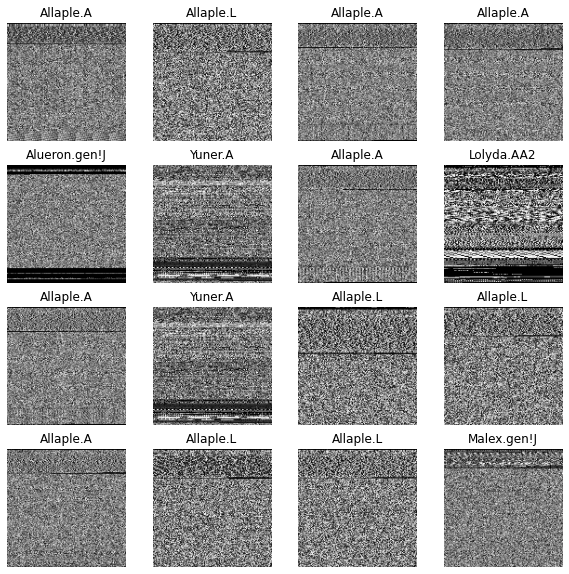

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### PARTE 3
Construcción de Red Neuronal (CNN)

In [15]:
path_images = ImageDataGenerator().flow_from_directory(directory=DATA_DIRECTORY, target_size=(128,128), batch_size=10000)

Found 9339 images belonging to 25 classes.


In [20]:
images, marks = next(path_images)

In [21]:
indices_path = path_images.class_indices

In [22]:
type_images = indices_path.keys()

In [23]:
for x in marks.shape:
    print(x)

9339
25


In [24]:
add = sum(marks)
marks_qt = marks.shape[0]

In [25]:
quantity = ((add)/marks_qt)

In [26]:
quantity = quantity*100
quantity

array([ 1.3063496 ,  1.2421031 , 31.577257  , 17.036085  ,  2.1201413 ,
        1.1350251 ,  1.5633365 ,  2.141557  ,  1.895278  ,  1.7346611 ,
        4.079666  ,  4.615055  ,  2.2807581 ,  1.9702322 ,  1.3170575 ,
        1.7025378 ,  1.4562588 ,  1.5205053 ,  1.6918299 ,  0.85662276,
        1.3705964 ,  1.4134276 ,  4.3687763 ,  1.038655  ,  8.566228  ],
      dtype=float32)

In [27]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, (3, 3), input_shape=(128, 128, 3), activation='relu', padding='same'))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(len(class_names), activation='softmax'))

### PARTE 4
Resumen del modelo

In [28]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['Accuracy', 'MeanSquaredError']
)

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 64)      18496     
_________________________________________________________________
flatten (Flatten)            (None, 1016064)           0         
_________________________________________________________________
dense (Dense)                (None, 64)                65028160  
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1625      
Total params: 65,049,177
Trainable params: 65,049,177
Non-trainable params: 0
_________________________________________________________________


### PARTE 5
División de los datos

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(images/255.,marks, test_size=0.3)

In [33]:
#Datasets de train de X
X_train.shape
X_train.size

321306624

In [34]:
#Dataset de test de X
X_test.shape
X_test.size

137723904

In [35]:
#Dataset de train de Y
y_train.shape
y_train.size

163425

In [36]:
#Dataset de test de Y
y_test.shape
y_test.size

70050

### PARTE 6
Entrenamiento de modelos

In [37]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (5, 5), input_shape=(128, 128, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(25, activation='softmax'))

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 128, 128, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 460800)           

In [39]:
model.layers

In [41]:
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

In [42]:
op = model.evaluate(X_test, y_test)
print("Accuracy ", op[1])

88/88 [==============================] - 15s 168ms/step - loss: 3.2362 - accuracy: 0.0857
Exactitud --> 0.08565310388803482


In [43]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=4)

Epoch 1/4
205/205 [==============================] - 216s 1s/step - loss: 0.7757 - accuracy: 0.7987 - val_loss: 1.0559 - val_accuracy: 0.8737
Epoch 2/4
205/205 [==============================] - 219s 1s/step - loss: 0.1337 - accuracy: 0.9599 - val_loss: 0.4967 - val_accuracy: 0.8612
Epoch 3/4
205/205 [==============================] - 160s 778ms/step - loss: 0.0783 - accuracy: 0.9763 - val_loss: 0.1249 - val_accuracy: 0.9647
Epoch 4/4
205/205 [==============================] - 148s 720ms/step - loss: 0.0538 - accuracy: 0.9850 - val_loss: 0.1129 - val_accuracy: 0.9668


In [44]:
type_images

dict_keys(['Adialer.C', 'Agent.FYI', 'Allaple.A', 'Allaple.L', 'Alueron.gen!J', 'Autorun.K', 'C2LOP.P', 'C2LOP.gen!g', 'Dialplatform.B', 'Dontovo.A', 'Fakerean', 'Instantaccess', 'Lolyda.AA1', 'Lolyda.AA2', 'Lolyda.AA3', 'Lolyda.AT', 'Malex.gen!J', 'Obfuscator.AD', 'Rbot!gen', 'Skintrim.N', 'Swizzor.gen!E', 'Swizzor.gen!I', 'VB.AT', 'Wintrim.BX', 'Yuner.A'])

In [46]:
y_pred=model.predict(X_test)

In [47]:
test_predict = np.argmax(model.predict(X_test), axis=-1)

In [48]:
target_test = np.argmax(y_test, axis=-1)

In [50]:
from sklearn.metrics import confusion_matrix

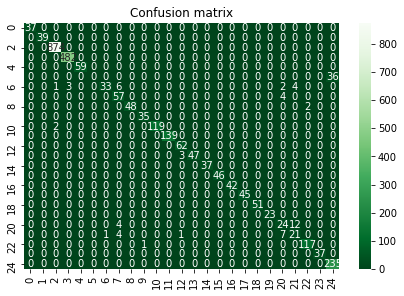

In [51]:
cm = confusion_matrix(target_test, test_predict)
get_cf(cm)

In [63]:
from sklearn.metrics import accuracy_score,classification_report

In [64]:
print(classification_report(test_predict, target_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00       877
           3       1.00      0.99      1.00       485
           4       1.00      1.00      1.00        59
           5       0.00      0.00      0.00         0
           6       0.67      0.97      0.80        34
           7       0.93      0.80      0.86        71
           8       0.96      1.00      0.98        48
           9       1.00      0.97      0.99        36
          10       0.98      1.00      0.99       119
          11       1.00      1.00      1.00       139
          12       1.00      0.94      0.97        66
          13       0.94      1.00      0.97        47
          14       1.00      1.00      1.00        37
          15       1.00      1.00      1.00        46
          16       1.00      1.00      1.00        42
          17       1.00    

c:\users\majo\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\majo\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\majo\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

### Parte 7
Discusión de resultados

> Podemos observar que el modelo tiene un buen desempeño aún luego de la evaluación y prueba con datos. El accuracy fue de 97%, y nos da un resultado alentador sobre el performance del modelo, y la capacidad que tiene para clasificar malware.
> Seria conveniente para futuros trabajos centrarse unicamente en una familia de Malware y analir cuales son las principales variantes dentro de una misma categoria, facilitando la busqueda de Headers o teniento el tipo se sabe que se debe buscar para detectar el Malware. 